# Simplification

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

## simplify

In [2]:
simplify(sin(x)**2 + cos(x)**2)

In [4]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [5]:
simplify(gamma(x)/gamma(x - 2))

But simplify() has a pitfall. It just applies all the major simplification operations in SymPy, and uses heuristics to determine the simplest result. But “simplest” is not a well-defined term. For example,

In [6]:
simplify(x**2 + 2*x + 1)

Another pitfall to simplify() is that it can be unnecessarily slow, since it tries many kinds of simplifications before picking the best one. If you already know exactly what kind of simplification you are after, it is better to apply the specific simplification function(s) that apply those simplifications.

## Polynomial/Rational Function Simplification

### expand

`expand()` is one of the most common simplification functions in SymPy. Although it has a lot of scopes, for now, we will consider its function in expanding polynomial expressions. For example:

In [7]:
expand((x + 1)**2)

In [8]:
expand((x + 2)*(x - 3))

In [9]:
expand((x + 1)*(x - 2) - (x - 1)*x)

### factor

`factor()` takes a polynomial and factors it into irreducible factors over the rational numbers. For example:

In [10]:
factor(x**3 - x**2 + x - 1)

In [11]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

For polynomials, factor() is the opposite of expand(). factor() uses a complete multivariate factorization algorithm over the rational numbers, which means that each of the factors returned by factor() is guaranteed to be irreducible.

If you are interested in the factors themselves, factor_list returns a more structured output.

In [12]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

In [14]:
expand((cos(x) + sin(x))**2)

In [13]:
factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

### collect

`collect()` collects common powers of a term in an expression. For example

In [16]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [17]:
collected_expr = collect(expr, x)
collected_expr

### cancel

`cancel()` will take any rational function and put it into the standard canonical form, $p/q$, where $p$ and $q$ are expanded polynomials with no common factors, and the leading coefficients of and do not have denominators (i.e., are integers).

In [18]:
cancel((x**2 + 2*x + 1)/(x**2 + x))

In [21]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

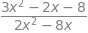

In [22]:
cancel(expr)

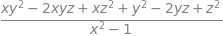

In [23]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

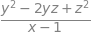

In [24]:
cancel(expr)

Note that since `factor()` will completely factorize both the numerator and the denominator of an expression, it can also be used to do the same thing:

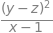

In [25]:
factor(expr)

### apart

`apart()` performs a partial fraction decomposition on a rational function.

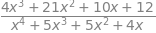

In [26]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

In [27]:
apart(expr)

## Trigonometric Simplification 

SymPy follows Python’s naming conventions for inverse trigonometric functions, which is to append an a to the front of the function’s name. For example, the inverse cosine, or arc cosine, is called `acos()`.

In [29]:
acos(x)

In [30]:
cos(acos(x))

In [31]:
asin(1)

### trigsimp

In [33]:
trigsimp(sin(x)**2 + cos(x)**2)

In [34]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [35]:
trigsimp(sin(x)*tan(x)/sec(x))

In [37]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [36]:
trigsimp(sinh(x)/tanh(x))

### expand_trig

In [40]:
expand_trig(sin(x + y))

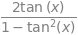

In [39]:
expand_trig(tan(2*x))

In [41]:
trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

## Powers

Before we introduce the power simplification functions, a mathematical discussion on the identities held by powers is in order. There are three kinds of identities satisfied by exponents

1. $x^a x^b = x^{a+b}$
2. $x^a y^a = (xy)^a$
3. $(x^a)^b = x^{ab}$

To summarize:

| Identity | Sufficient Condition to hold | Counterexample | Important consequences |
| --- | --- | --- | --- |
| $x^a x^b = x^{a+b}$ | Always true | None | None |
| $x^a y^a = (xy)^a$ | $x$ and $y$ are positive and $a$ is real | $x=-1$, $y=-1$, $a=1/2$ | $(xy)^a \neq x^a y^a$ |
| $(x^a)^b = x^{ab}$ | $b$ is integer | $x=-1$, $a=2$, $b=1/2$ | $x^{ab} \neq (x^a)^b$ |

all we need to know are the following:

- By default, SymPy Symbols are assumed to be complex (elements of 
). That is, a simplification will not be applied to an expression with a given Symbol unless it holds for all complex numbers.

- Symbols can be given different assumptions by passing the assumption to symbols(). For the rest of this section, we will be assuming that x and y are positive, and that a and b are real. We will leave z, t, and c as arbitrary complex Symbols to demonstrate what happens in that case.

In [42]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [43]:
sqrt(x) == x**Rational(1, 2)

True

### powsimp

In [44]:
powsimp(x**a*x**b)

In [45]:
powsimp(x**a*y**a)

In [46]:
powsimp(t**c*z**c, force=True)

In [49]:
(z*t)**2

In [48]:
sqrt(x*y)

In [52]:
powsimp(z**2*t**2)

In [53]:
powsimp(sqrt(x)*sqrt(y))

### expand_power_exp / expand_power_base

In [54]:
expand_power_exp(x**(a + b))

In [55]:
expand_power_base((x*y)**a)

In [56]:
expand_power_base((z*t)**c)

In [57]:
expand_power_base((z*t)**c, force=True)

In [60]:
x**2*x**3

In [58]:
expand_power_exp(x**5)

### powdenest

In [61]:
powdenest((x**a)**b)

In [62]:
powdenest((z**a)**b)

In [63]:
powdenest((z**a)**b, force=True)

## Exponentials and logarithms

In [64]:
ln(x)

Logarithms have similar issues as powers. There are two main identities:

1. $\log(x y) = \log(x) + \log(y)$
2. $\log(x^n) = n \log(x)$

Neither identity is true for arbitrary complex $x$ and $y$, due to the branch cut in the complex plane for the complex logarithm. However, sufficient conditions for the identities to hold are if $x$ and $y$ are positive and $n$ is real.

In [65]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

### expand_log

In [66]:
expand_log(log(x/y))

In [70]:
expand_log(log(x**2))

In [68]:
expand_log(log(x**n))

In [69]:
expand_log(log(z*t))

In [71]:
expand_log(log(z**2))

In [72]:
expand_log(log(z**2), force=True)

### logcombine

In [76]:
logcombine(log(x) + log(y))

In [77]:
logcombine(n*log(x))

In [78]:
logcombine(n*log(z))

In [79]:
logcombine(n*log(z), force=True)

### Special Functions

In [80]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

In [81]:
factorial(n)

In [82]:
binomial(n, k)

In [83]:
gamma(z)

In [84]:
hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

### rewrite

In [87]:
tan(x).rewrite(cos)

In [88]:
factorial(x).rewrite(gamma)

### expand_func

In [89]:
expand_func(gamma(x + 3))

### hyperexpand

In [90]:
hyperexpand(hyper([1, 1], [2], z))

In [91]:
expr = meijerg([[1],[1]], [[1],[]], -z)
expr

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

In [92]:
hyperexpand(expr)

### combsimp

In [93]:
n, k = symbols('n k', integer = True)
combsimp(factorial(n)/factorial(n - 3))

In [94]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

### gammasimp

In [95]:
gammasimp(gamma(x)*gamma(1 - x))

## Example: Continued Fractions

In [96]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr
list_to_frac([x, y, z])

In [97]:
list_to_frac([1, 2, 3, 4])

In [99]:
syms = symbols('a0:5')
syms

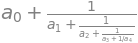

In [100]:
a0, a1, a2, a3, a4 = syms
frac = list_to_frac(syms)
frac

In [101]:
frac = cancel(frac)
frac

In [102]:
l = []
frac = apart(frac, a0)
frac

In [103]:
l.append(a0)
frac = 1/(frac - a0)
frac

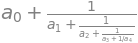

In [104]:
frac = apart(frac, a1)
frac
l.append(a1)
frac = 1/(frac - a1)
frac = apart(frac, a2)
frac
l.append(a2)
frac = 1/(frac - a2)
frac = apart(frac, a3)
frac
l.append(a3)
frac = 1/(frac - a3)
frac = apart(frac, a4)
frac
l.append(a4)
list_to_frac(l)

In [108]:
import random
l = list(symbols('a0:5'))
random.shuffle(l)
orig_frac = frac = cancel(list_to_frac(l))
orig_frac